In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
`

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [5]:
df["normalized-losses"].replace("?",np.nan,inplace=True)

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
df["normalized-losses"]=df["normalized-losses"].astype("float")

nlmean=df["normalized-losses"].mean()
df["normalized-losses"].fillna(nlmean,inplace=True)

In [8]:
df["horsepower"].replace("?",np.nan,inplace=True)

df["horsepower"]=df["horsepower"].astype("float")

hpmean=df["horsepower"].mean()
df["horsepower"].fillna(hpmean,inplace=True)

In [9]:
for i,j in zip(df["make"].unique(),range(len(df["make"]))):
    print (f"for {i}------->{j}")

for alfa-romero------->0
for audi------->1
for bmw------->2
for chevrolet------->3
for dodge------->4
for honda------->5
for isuzu------->6
for jaguar------->7
for mazda------->8
for mercedes-benz------->9
for mercury------->10
for mitsubishi------->11
for nissan------->12
for peugot------->13
for plymouth------->14
for porsche------->15
for renault------->16
for saab------->17
for subaru------->18
for toyota------->19
for volkswagen------->20
for volvo------->21


In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [11]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

<AxesSubplot:xlabel='price', ylabel='make'>

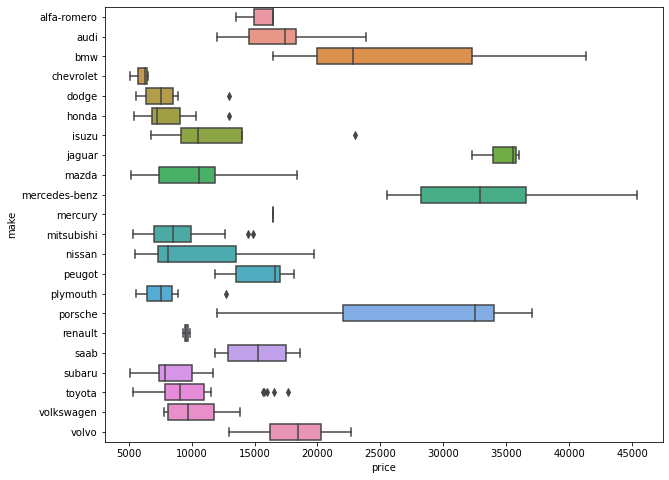

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df["price"],y=df["make"])

In [13]:
df[(df["make"]=="dodge") & (df["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [14]:
df.drop(29,inplace=True)

In [15]:
df[(df["make"]=="honda") & (df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [16]:
df.drop(41,inplace=True)

In [17]:
df[(df["make"]=="isuzu") & (df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [18]:
df.drop(45,inplace=True)

In [19]:
df[(df["make"]=="mitsubishi") & (df["price"]>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [20]:
df.drop([83,84],inplace=True)

In [21]:
df[(df["make"]=="plymouth") & (df["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [22]:
df.drop(124,inplace=True)

In [23]:
df[(df["make"]=="toyota") & (df["price"]>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [24]:
df.drop([172,178,179,180,181],inplace=True)

In [25]:
df_cat=df.select_dtypes("object")

In [26]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [27]:
df_num=df.select_dtypes(["int","float"])
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [30]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [31]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [32]:
df=pd.concat([df_cat,df_num],axis=1)

In [33]:
df

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,21,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,21,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,21,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [34]:
from scipy.stats import skew

symboling
0.21386866184357742


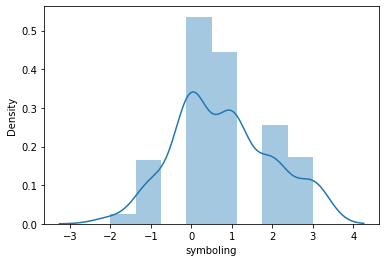

normalized-losses
0.848205953606264


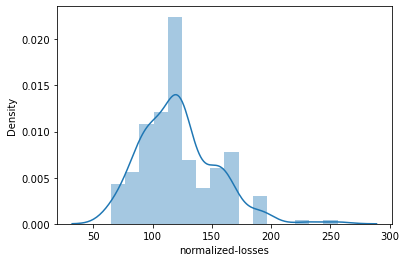

width
0.9140400320504322


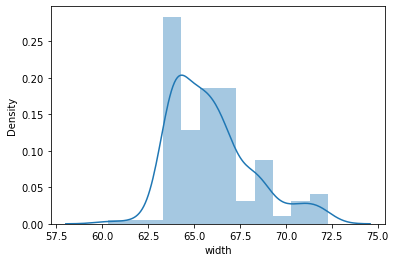

height
0.013839962443639326


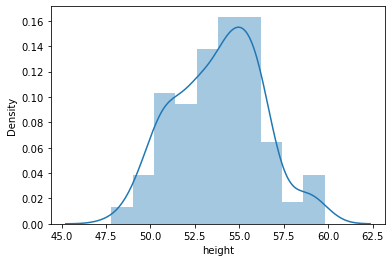

engine-size
2.0541257626466156


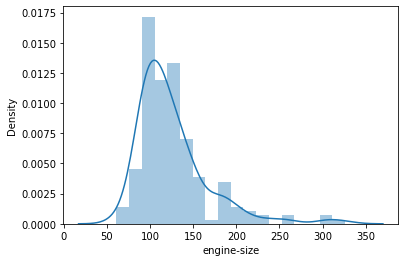

horsepower
1.5556576549504106


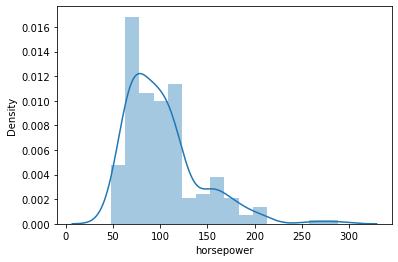

city-mpg
0.5999073033714895


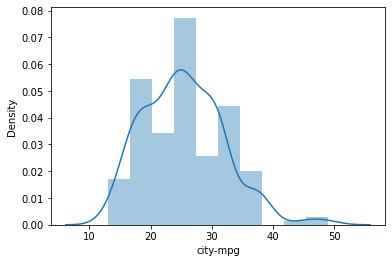

highway-mpg
0.4760310091695327


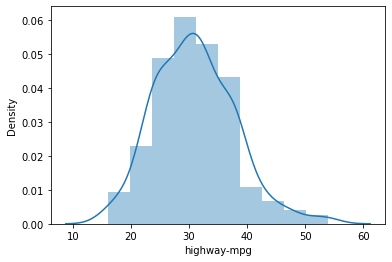

price
1.8166794702973463


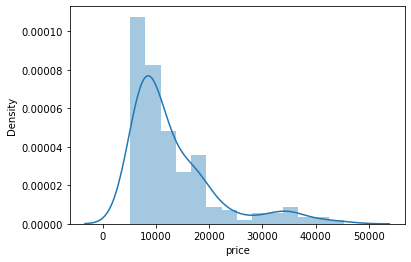

In [35]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))

    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

<AxesSubplot:>

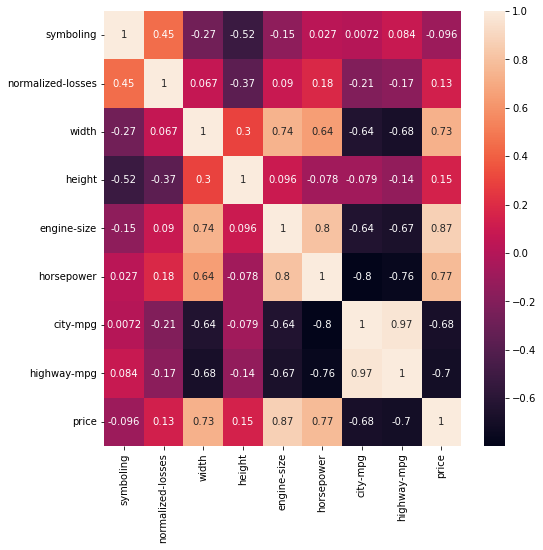

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(), annot=True)

In [37]:
skew(df_num["normalized-losses"])

0.848205953606264

In [38]:
df_num["normalized-losses"]=np.sqrt(df_num["normalized-losses"])

In [39]:
skew(df_num["normalized-losses"])

0.4136415061835428

In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [41]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 194, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [43]:
xtrain

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
104,12,1,2,2,0,5,3,194.0,67.9,49.7,181,160.0,19,25
200,21,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28
18,3,1,2,1,0,2,2,121.0,60.3,53.2,61,48.0,47,53
165,19,1,3,2,0,0,1,168.0,64.0,52.6,98,112.0,26,29
118,14,1,2,1,0,3,1,119.0,63.8,50.8,90,68.0,37,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,18,1,2,1,0,4,2,83.0,63.6,53.7,108,73.0,26,31
143,18,1,3,1,0,4,0,102.0,65.4,52.5,108,94.0,26,32
75,10,1,2,2,0,3,1,122.0,68.0,54.8,140,175.0,19,24
146,18,1,4,1,0,4,0,89.0,65.4,53.0,108,82.0,28,32


In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [45]:
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [46]:
lr.coef_

array([-1.32636635e+02, -1.38122028e+03,  4.48404059e+01,  1.52465878e+03,
        1.24318303e+04, -3.41654709e+01,  4.62216739e+02, -2.99460049e+00,
        7.09029011e+02,  3.86204172e+02,  8.74638191e+01,  2.03289041e+01,
        6.85246449e+01, -1.92338404e+02])

In [47]:
pd.DataFrame(lr.coef_,x.columns)

,0
make,-132.636635
fuel-type,-1381.220277
body-style,44.840406
drive-wheels,1524.658782
engine-location,12431.830285
engine-type,-34.165471
symboling,462.216739
normalized-losses,-2.994600
width,709.029011
height,386.204172


In [48]:
lr.intercept_

-62559.40942971634

<AxesSubplot:xlabel='price'>

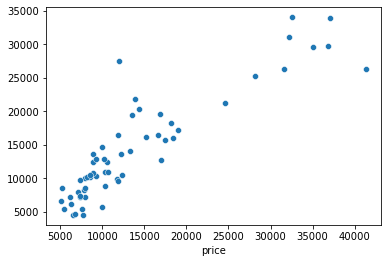

In [49]:
sns.scatterplot(x=ytest,y=ypred)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [51]:
print(f"MAE = {mean_absolute_error(ytest,ypred)}")
print(f"MSE = {mean_squared_error(ytest,ypred)}")
print(f"RMSE = {np.sqrt(mean_absolute_error(ytest,ypred))}")
print(f"Accuracy= {round((r2_score(ytest,ypred)*100),2)}%")

MAE = 2812.8252725337593
MSE = 16621454.100955186
RMSE = 53.03607519918644
Accuracy= 79.78%


In [52]:
df.columns

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'symboling', 'normalized-losses', 'width', 'height',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [53]:
le.classes_

array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)

In [54]:
df["symboling"].value_counts().sort_index()

-2     3
-1    20
 0    65
 1    54
 2    31
 3    21
Name: symboling, dtype: int64

In [64]:
x.shape

(194, 14)

In [58]:
import pickle
pickle.dump(lr , open("price_pred.pkl" , "wb")) #obj --> bytestream

In [60]:
x.columns

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'symboling', 'normalized-losses', 'width', 'height',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [61]:
# uq_name=df["make"].unique()

In [62]:
uq_name

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [56]:
# make=int(input("Car Make [0-21] : "))
# fuel=int(input("Fuel type [0-1](gas,diesel): "))
# body_style=int(input("Body Style choose [0-4] from (convertible,hardtop,hatchback,sedan,wagon): "))
# drive=int(input("For drive wheels [0-2] from (4wd,fwd,rwd) : "))
# engloc=int(input("Engine Location [0-1] from (front,rear): "))
# engtyp=int(input("Engine Type [0-6] from (dohc,dohcv,l,ohc,ohcf,ohcv,rotor) : "))
# symbol=int(input("Symbol [-2 to 3] : "))
# nloss=int(input("Normalized loss : "))
# width=int(input("Width : "))
# height=int(input("Height : "))
# engine_size=int(input("Engine Size : "))
# hp=int(input("Horsepower : "))
# citympg=int(input("City Milage : "))
# highwaympg=int(input("Highway Milage : "))

In [ ]:
price=lr.predict([[make,fuel,body_style,drive,engloc,engtyp,symbol,nloss,width,height,engine_size,hp,citympg,highwaympg]])
print(price)

print(f"Estimated Price of the car according to the parameters is : {round(price[0],2)}$")